In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
!pip install unicodecsv &>/dev/null

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, InputLayer, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences 

from keras.models import Sequential
from keras.layers import Dense, Embedding, InputLayer,concatenate, Flatten
from keras.layers import LSTM, SimpleRNN
from keras.models import Model, Input
from keras.callbacks import ModelCheckpoint

from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, unicodecsv as csv
import os
import shutil
import glob


from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

#import cv2
#from keras.applications.vgg16 import VGG16



## Pre-processing CSV files to have data in required format

In [ ]:
%cd /content/drive/MyDrive/Multimodal Sentiment Analysis/Pallavi_CSV

/content/drive/.shortcut-targets-by-id/1Yd0RqjQBSMhygQUjEFZqzkTOA00fA3AG/Multimodal Sentiment Analysis/Pallavi_CSV


In [ ]:
Df_train=pd.read_csv('Train_Data.csv') # read data from csv in pandas dataframe

In [ ]:
Df_test=pd.read_csv('Test_Data.csv') # read data from csv in pandas dataframe

In [ ]:
Df_train = Df_train.drop(['Unnamed: 0'], axis  = 1)
Df_train.head()

,id,Reviews,Sentiment_x,processed,Image,Sentiment_y,Final Sentiment
0,1,How I feel today #legday #jelly #aching #gym \n,0,feel today legday jelly aching gym,./1.jpg,1,1
1,2,grattis min griskulting!!!???? va bara tvungen...,0,grattis min griskulting va bara tvungen oki sc...,./2.jpg,1,1
2,3,RT @polynminion: The moment I found my favouri...,0,moment found favourite tv character. profoundlove,./3.jpg,1,1
3,4,#escort We have a young and energetic team and...,1,esco young energetic team pride offering highe...,./4.jpg,1,1
4,5,"RT @chrisashaffer: Went to SSC today to be a ""...",1,"went ssc today ""movie star"" rep deaf got meet ...",./5.jpg,1,1


In [ ]:
Df_train['Sentiment_y'].value_counts()

1    2250
2     982
0     768
Name: Sentiment_y, dtype: int64

In [ ]:
print("Training data length", len(Df_train))
print("Test data length", len(Df_test))

Training data length 4000
Test data length 869


In [ ]:
#check new columns added
Df_test = Df_test.drop(['Unnamed: 0'], axis  = 1)
Df_test.head()

,id,Reviews,Sentiment_x,processed,Image,Sentiment_y,Final Sentiment
0,4261,Crazy. RT @DtaySUAVE: Can I get a show of hand...,0,crazy. can get show hands..fact figment imagin...,./4261.jpg,1,1
1,4262,ԥåڤ!!!?????????????????? http://t.co/KM9gF7nHjq\n,0,ԥåڤ http://t.co/km9gf7nhjq,./4262.jpg,2,2
2,4263,DJ/HOSSY http://t.\n,0,dj/hossy http://t.,./4263.jpg,1,1
3,4264,#MeekBeLike Drake not even crippled http://t.c...,0,meekbelike drake not even crippled http://t.co...,./4264.jpg,2,2
4,4265,100 MILLION animals POISONED BURNED CRIPPLED i...,2,100 million animals poisoned burned crippled u...,./4265.jpg,2,2


## creating Text train, validatation & test data

In [ ]:
Y_train_txt_data = Df_train.iloc[:,2]
Y_train_txt_data

0       0
1       0
2       0
3       1
4       1
       ..
3995    1
3996    1
3997    0
3998    1
3999    1
Name: Sentiment_x, Length: 4000, dtype: int64

In [ ]:
Y_train_txt_data = Df_train.iloc[:,2]
Y_train_txt_labels=np.array(Y_train_txt_data)
print(Y_train_txt_labels)

[0 0 0 ... 0 1 1]


In [ ]:

X_train_txt_data = Df_train.iloc[:,3]
X_train_txt_data

0                      feel today legday jelly aching gym
1       grattis min griskulting va bara tvungen oki sc...
2       moment found favourite tv character. profoundlove
3       esco young energetic team pride offering highe...
4       went ssc today "movie star" rep deaf got meet ...
                              ...                        
3995    crazy movie info http://t.co/7xaulzowwm http:/...
3996    new album, antarctigo vespucci leave crazy lif...
3997                                ƿcrazyυȥ؁bäƥ http://
3998    happy winchesterwednesday crazy babe http://t....
3999    merchandise praising drug lord el chapo sellin...
Name: processed, Length: 4000, dtype: object

In [ ]:
Y_test_txt_data = Df_test.iloc[:,2]
Y_test_txt_labels=np.array(Y_test_txt_data)
print(Y_train_txt_labels)

[0 0 0 ... 0 1 1]


In [ ]:
X_test_txt_data = Df_test.iloc[:,3]

In [ ]:
#print("X train IMG Shape: ",X_train_img_data.shape)
print("y train text shape: ",Y_train_txt_labels.shape)
print("X train text shape: ",X_train_txt_data.shape)

y train text shape:  (4000,)
X train text shape:  (4000,)


In [ ]:
X_train_txt_data.head()

0                   feel today legday jelly aching gym
1    grattis min griskulting va bara tvungen oki sc...
2    moment found favourite tv character. profoundlove
3    esco young energetic team pride offering highe...
4    went ssc today "movie star" rep deaf got meet ...
Name: processed, dtype: object

In [ ]:
X_train_txt_data = X_train_txt_data.apply(str)

In [ ]:
type(X_train_txt_data)

pandas.core.series.Series

In [ ]:
#prepare a tokenizer
x_tokenizer = Tokenizer() 

x_tokenizer.fit_on_texts(X_train_txt_data)

In [ ]:
x_tokenizer.word_index

{'http': 1,
 't': 2,
 'co': 3,
 'love': 4,
 'new': 5,
 'day': 6,
 'not': 7,
 'happy': 8,
 'black': 9,
 'like': 10,
 'today': 11,
 '2': 12,
 "i'm": 13,
 'one': 14,
 'get': 15,
 'abandoned': 16,
 'take': 17,
 '1': 18,
 'hea': 19,
 'night': 20,
 'can': 21,
 'pa': 22,
 'ed': 23,
 'https': 24,
 'got': 25,
 'time': 26,
 'de': 27,
 'life': 28,
 'passionate': 29,
 'see': 30,
 'still': 31,
 'crazy': 32,
 'wild': 33,
 'strong': 34,
 'happiness': 35,
 'finished': 36,
 'u': 37,
 'vibrant': 38,
 'htt': 39,
 'man': 40,
 'fun': 41,
 '3': 42,
 'last': 43,
 'excited': 44,
 '4': 45,
 'broken': 46,
 'much': 47,
 'us': 48,
 'depression': 49,
 'first': 50,
 'beautiful': 51,
 '5': 52,
 'feeling': 53,
 'cut': 54,
 'blue': 55,
 'h': 56,
 'back': 57,
 'winter': 58,
 'quiz': 59,
 'look': 60,
 'go': 61,
 'full': 62,
 'feel': 63,
 'photo': 64,
 'people': 65,
 'left': 66,
 "can't": 67,
 'via': 68,
 'fear': 69,
 "valentine's": 70,
 'little': 71,
 'make': 72,
 'good': 73,
 'beaten': 74,
 'white': 75,
 'world': 76,
 

In [ ]:
dict_len=len(x_tokenizer.word_index)
print(dict_len)

12343


In [ ]:
# prepare the tokenizer again with unk
x_tokenizer = Tokenizer(num_words=dict_len,oov_token='unk')

#prepare vocabulary
x_tokenizer.fit_on_texts(X_train_txt_data)

In [ ]:
# maximum sequence length allowed
max_len = 50

#convert text sequences into integer sequences
X_train_data_seq = x_tokenizer.texts_to_sequences(X_train_txt_data)
#X_test_data_seq = x_tokenizer.texts_to_sequences(X_test_txt_data)

#padding up with zero 
X_train_data_seq  = pad_sequences(X_train_data_seq,  padding='post', maxlen=max_len)
#X_test_data_seq  = pad_sequences(X_test_data_seq, padding='post', maxlen=max_len)

In [ ]:
X_test_txt_data = X_test_txt_data.apply(str)

In [ ]:
# maximum sequence length allowed
max_len = 50

#convert text sequences into integer sequences
X_test_data_seq = x_tokenizer.texts_to_sequences(X_test_txt_data)
#X_test_data_seq = x_tokenizer.texts_to_sequences(X_test_txt_data)

#padding up with zero 
X_test_data_seq  = pad_sequences(X_test_data_seq,  padding='post', maxlen=max_len)
X_test_txt=X_test_data_seq
#X_test_data_seq  = pad_sequences(X_test_data_seq, padding='post', maxlen=max_len)

In [ ]:
x_voc_size = x_tokenizer.num_words+1
x_voc_size

12344

In [ ]:
X_train_data_seq[58]

array([ 105,  604,  687, 4313, 2505,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

In [ ]:
# training label encoder

'''nb_classes = 3
encoder=LabelEncoder()
encoded_Y_train = encoder.fit_transform(Y_train_txt_labels)

#Y_train_txt_catlabels = np_utils.to_categorical(encoded_Y,nb_classes)'''

Y_train_txt_catlabels = tf.keras.utils.to_categorical(Y_train_txt_labels, num_classes=3,dtype='int')

print(Y_train_txt_catlabels[3000])


[0 1 0]


In [ ]:
# test data y label encoder

'''nb_classes = 3
encoder=LabelEncoder()
encoded_Y_test = encoder.fit_transform(Y_test_txt_labels)
'''
#Y_test_txt_catlabels = np_utils.to_categorical(encoded_Y,nb_classes)

Y_test_txt_catlabels = tf.keras.utils.to_categorical(Y_test_txt_labels, num_classes=3,dtype='int')
Y_test_txt=Y_test_txt_catlabels




In [ ]:
print("Training Labels",Y_train_txt_catlabels.shape)

print("Testing Labels",Y_test_txt_catlabels.shape)

Training Labels (4000, 3)
Testing Labels (869, 3)


In [ ]:
#shuffle - this is used in train-test split

#X_train_data_seq  = shuffle(X_train_data_seq, random_state = 42)
#X_test_data_seq = shuffle(X_test_data_seq, random_state = 42)


#Y_train_labels = shuffle(Y_train_txt_catlabels, random_state = 42)
#Y_test_labels = shuffle(Y_test_txt_catlabels, random_state = 42)


In [ ]:
from sklearn.model_selection import train_test_split
X_train_txt,X_valid_txt,Y_train_txt,Y_valid_txt=train_test_split(X_train_data_seq, Y_train_txt_catlabels, test_size=0.3, random_state=42,shuffle=True)

In [ ]:
# shape of training and validation set
(X_train_txt.shape, Y_train_txt.shape), (X_valid_txt.shape, Y_valid_txt.shape)

(((2800, 50), (2800, 3)), ((1200, 50), (1200, 3)))

## Text Model with Functional API and RNN



In [ ]:
# RNN Model with SimpleRNN using Functional APIs

max_len = 50

text_input=tf.keras.Input(shape=(max_len,),dtype='int32')  
embedding_layer=tf.keras.layers.Embedding(x_voc_size+1, 128,input_length=max_len, mask_zero=True)(text_input)

text_rnn_layer=tf.keras.layers.SimpleRNN(128,activation='relu')(embedding_layer)
flatten = tf.keras.layers.Flatten()(text_rnn_layer)

text_dense= tf.keras.layers.Dense(128, activation='relu')(flatten)

text_part= tf.keras.layers.Dropout(rate=0.2)(text_dense) # this is used as text part in concatenate layer

text_out=tf.keras.layers.Dense(3, activation='softmax')(text_part) # text output layer which will be used in combined model

text_model = tf.keras.Model(inputs=text_input, outputs=text_out)

In [ ]:
# printing summary of the model
text_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 128)           1580160   
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 387   

In [ ]:
text_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
text_history=text_model.fit(X_train_txt, Y_train_txt, batch_size=32, epochs=15, verbose=1, validation_data=(X_valid_txt, Y_valid_txt))

Epoch 1/15
88/88 [==============================] - 13s 118ms/step - loss: 1.0763 - accuracy: 0.3975 - val_loss: 1.0152 - val_accuracy: 0.4725
Epoch 2/15
88/88 [==============================] - 10s 111ms/step - loss: 0.7048 - accuracy: 0.7254 - val_loss: 1.0895 - val_accuracy: 0.5283
Epoch 3/15
88/88 [==============================] - 10s 111ms/step - loss: 0.1451 - accuracy: 0.9550 - val_loss: 1.2300 - val_accuracy: 0.5383
Epoch 4/15
88/88 [==============================] - 10s 112ms/step - loss: 0.0557 - accuracy: 0.9818 - val_loss: 1.3819 - val_accuracy: 0.5275
Epoch 5/15
88/88 [==============================] - 10s 114ms/step - loss: 0.0357 - accuracy: 0.9861 - val_loss: 1.4082 - val_accuracy: 0.5100
Epoch 6/15
88/88 [==============================] - 10s 111ms/step - loss: 0.0265 - accuracy: 0.9886 - val_loss: 1.5907 - val_accuracy: 0.5167
Epoch 7/15
88/88 [==============================] - 10s 111ms/step - loss: 0.0236 - accuracy: 0.9886 - val_loss: 1.6541 - val_accuracy: 0.5242

In [ ]:
text_predictions = text_model.predict(X_test_txt)

In [ ]:
import sklearn.model_selection
import sklearn.metrics
import sklearn.preprocessing

In [ ]:
print('Classification Report:')
print(sklearn.metrics.classification_report(Y_test_txt_labels, np.argmax(text_predictions, axis=1)))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(Y_test_txt_labels, np.argmax(text_predictions, axis=1)))

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.18      0.28       398
           1       0.32      0.94      0.48       255
           2       0.67      0.06      0.12       216

    accuracy                           0.37       869
   macro avg       0.55      0.39      0.29       869
weighted avg       0.56      0.37      0.30       869

Confusion Matrix:
[[ 70 323   5]
 [ 14 239   2]
 [ 23 179  14]]


## preparing image train, validation and test data 

In [ ]:
%cd /content/drive/MyDrive/Multimodal Sentiment Analysis/Test/data/MVSA_Single/data

/content/drive/.shortcut-targets-by-id/1Yd0RqjQBSMhygQUjEFZqzkTOA00fA3AG/Multimodal Sentiment Analysis/Test/data/MVSA_Single/data


In [ ]:
from PIL import Image

In [ ]:
from PIL import Image
import os, sys

v = "/content/drive/MyDrive/Multimodal Sentiment Analysis/Pallavi_CSV/MVSA-Single/MVSA_Single/img_data/"

def resize():
  for path in glob.glob("./*.jpg"):
          im = Image.open(path)
          f, e = os.path.splitext(path)
          print(f)
          f = f.split('./')
          i = f[1]
          print(e)
          imResize = im.resize((128,128), Image.ANTIALIAS)
          imResize.save(v + i + e, 'JPEG', quality=90)

#resize()

In [ ]:
%cd /content/drive/MyDrive/Multimodal Sentiment Analysis/Pallavi_CSV/MVSA-Single/MVSA_Single/img_data/

/content/drive/.shortcut-targets-by-id/1Yd0RqjQBSMhygQUjEFZqzkTOA00fA3AG/Multimodal Sentiment Analysis/Pallavi_CSV/MVSA-Single/MVSA_Single/img_data


In [ ]:
from numpy.ma.core import asarray
print(Df_train.Image[0])
img_name = Df_train.Image[0]
img = Image.open(img_name)
img = img.resize((128, 128), Image.ANTIALIAS)
img = plt.imread(img_name)
np_image = asarray(img)
np_image

./1.jpg


masked_array(
  data=[[[118,  67,  14],
         [127,  64,  13],
         [133,  63,  14],
         ...,
         [178, 108,  38],
         [217, 138,  69],
         [224, 137,  70]],

        [[119,  67,  17],
         [127,  65,  16],
         [134,  64,  15],
         ...,
         [185, 115,  45],
         [226, 149,  77],
         [246, 159,  88]],

        [[118,  67,  20],
         [127,  64,  20],
         [132,  64,  19],
         ...,
         [183, 115,  44],
         [224, 151,  74],
         [254, 173,  94]],

        ...,

        [[ 15,   2,   0],
         [ 24,  11,   2],
         [ 33,  16,   6],
         ...,
         [107,  81,  54],
         [102,  71,  51],
         [101,  66,  60]],

        [[ 11,   1,   0],
         [ 23,  10,   1],
         [ 32,  18,   7],
         ...,
         [123, 102,  75],
         [121,  94,  75],
         [114,  81,  76]],

        [[ 10,   0,   0],
         [ 22,   9,   0],
         [ 32,  18,   7],
         ...,
         [ 88,  68, 

In [ ]:
X = []
X.append(np_image)
X = np.array(X)

In [ ]:
X.shape

(1, 128, 128, 3)

(128, 128)


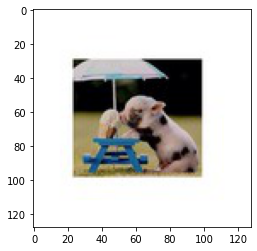

In [ ]:
img_name = Df_train.Image[1]
img = Image.open(img_name)
img = img.resize((128, 128), Image.ANTIALIAS)
img
print(img.size)
plt.imshow(img)

(128, 128)


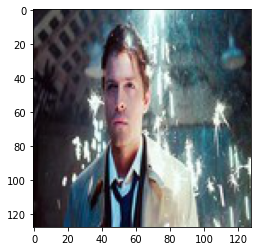

In [ ]:
img_name = Df_train.Image[2]
img = Image.open(img_name)
print(img.size)
plt.imshow(img)

In [ ]:
%cd /content/drive/MyDrive/Multimodal Sentiment Analysis/Pallavi_CSV/MVSA-Single/MVSA_Single/img_data/

/content/drive/.shortcut-targets-by-id/1Yd0RqjQBSMhygQUjEFZqzkTOA00fA3AG/Multimodal Sentiment Analysis/Pallavi_CSV/MVSA-Single/MVSA_Single/img_data


In [ ]:
Df_train.head(2)


,id,Reviews,Sentiment_x,processed,Image,Sentiment_y,Final Sentiment
0,1,How I feel today #legday #jelly #aching #gym \n,0,feel today legday jelly aching gym,./1.jpg,1,1
1,2,grattis min griskulting!!!???? va bara tvungen...,0,grattis min griskulting va bara tvungen oki sc...,./2.jpg,1,1


In [ ]:
# load training images and store it in numpy array

# empty list to store the images
X_train_img_data = []
# iterating over each image
for img_name in Df_train.Image:
    # loading the image using its name
    img = plt.imread(img_name)

    # saving each image in the list
    X_train_img_data.append(img)
    
# converting the list of images into array
X_train_img_data=np.array(X_train_img_data)

# storing the target variable in separate variable


In [ ]:
print("X train Shape: ",X_train_img_data.shape) # labels are taken from text part

X train Shape:  (4000, 128, 128, 3)


In [ ]:
# load training images and store it in numpy array

# empty list to store the images
X_test_img_data = []
# iterating over each image
for img_name in Df_test.Image:
    # loading the image using its name
    img = plt.imread(img_name)

    # saving each image in the list
    X_test_img_data.append(img)
    
# converting the list of images into array
X_test_img_data=np.array(X_test_img_data)

In [ ]:
print("X test Shape: ",X_test_img_data.shape) # labels are taken from text part


In [ ]:
from matplotlib import*

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

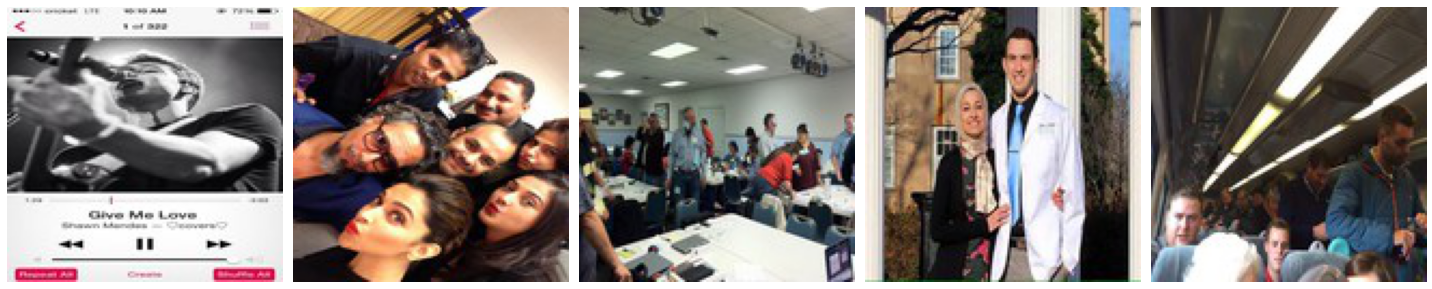

In [ ]:
plotImages(X_train_img_data[5:10])

In [ ]:
# normalizing the pixel values
X_train_img_data = X_train_img_data / X_train_img_data.max()

In [ ]:
# normalizing the pixel values
X_test_img_data = X_test_img_data / X_test_img_data.max()

In [ ]:
X_test_img=X_test_img_data

In [ ]:
Y_train_img_data = Df_train.iloc[:,5]
Y_train_img_data

0       1
1       1
2       1
3       1
4       1
       ..
3995    1
3996    1
3997    2
3998    1
3999    0
Name: Sentiment_y, Length: 4000, dtype: int64

In [ ]:
Y_train_img_data.value_counts()

1    2250
2     982
0     768
Name: Sentiment_y, dtype: int64

In [ ]:
Y_test_img_data = Df_test.iloc[:,5]
Y_test_img_data

0      1
1      2
2      1
3      2
4      2
      ..
864    1
865    0
866    1
867    1
868    1
Name: Sentiment_y, Length: 869, dtype: int64

In [ ]:
# training label encoder

'''nb_classes = 3
encoder=LabelEncoder()
encoded_Y_train_img = encoder.fit_transform(Y_train_img_data)'''

#Y_train_txt_catlabels = np_utils.to_categorical(encoded_Y,nb_classes)

Y_train_img_catlabels = tf.keras.utils.to_categorical(Y_train_img_data, num_classes=3,dtype='int')

print(Y_train_img_catlabels[3000])


[0 1 0]


In [ ]:
# test data y label encoder

'''nb_classes = 3
encoder=LabelEncoder()
encoded_Y_test_img = encoder.fit_transform(Y_test_img_data)'''

#Y_test_txt_catlabels = np_utils.to_categorical(encoded_Y,nb_classes)

Y_test_img_catlabels = tf.keras.utils.to_categorical(Y_test_img_data, num_classes=3,dtype='int')
Y_test_img=Y_test_img_catlabels



In [ ]:
# create random number generator
seed = 42

In [ ]:
from sklearn.model_selection import train_test_split
X_train_img,X_valid_img,Y_train_img,Y_valid_img=train_test_split(X_train_img_data, Y_train_img_catlabels, test_size=0.3, random_state=42,shuffle=True,stratify=Y_train_img_catlabels)

In [ ]:
# shape of training and validation set
(X_train_img.shape, Y_train_img.shape), (X_valid_img.shape, Y_valid_img.shape)

(((2800, 128, 128, 3), (2800, 3)), ((1200, 128, 128, 3), (1200, 3)))

## Functional API Model with CNN

In [ ]:
#CNN model till dense layer

img_width=128
img_height=128

image_input = tf.keras.layers.Input(shape=(img_height, img_width, 3))
# Note the input shape is the desired size of the image e.g 100x100 with 3 bytes color

# This is the first convolution
conv1=tf.keras.layers.Conv2D(16, (3,3), activation='relu', strides=(1, 1), padding='valid')(image_input)
pool1=tf.keras.layers.MaxPooling2D((2, 2),padding='valid')(conv1)

 # The second convolution
conv2= tf.keras.layers.Conv2D(32, (3,3), activation='relu',strides=(1, 1), padding='valid')(pool1)
pool2=tf.keras.layers.MaxPooling2D((2,2),padding='valid')(conv2)

# The third convolution
conv3=tf.keras.layers.Conv2D(64, (3,3), activation='relu',strides=(1, 1), padding='valid')(pool2)
pool3=tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='valid')(conv3)
    # The fourth convolution
conv4=tf.keras.layers.Conv2D(64, (3,3), activation='relu',strides=(1, 1), padding='valid')(pool3)
pool4= tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='valid')(conv4)
    # The fifth convolution
conv5= tf.keras.layers.Conv2D(64, (3,3), activation='relu',strides=(1, 1), padding='valid')(pool4)
pool5=tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='valid')(conv4)
    # Flatten the results to feed into a DNN
flatten=tf.keras.layers.Flatten()(pool5)
    # 512 neuron hidden layer
img_dense1 =tf.keras.layers.Dense(512, activation='relu',kernel_regularizer = tf.keras.regularizers.l2(l = 0.001))(flatten)
bn1=tf.keras.layers.BatchNormalization()(img_dense1)
drop1=tf.keras.layers.Dropout(rate=0.25)(bn1)

img_dense2= tf.keras.layers.Dense(256, activation='relu',kernel_regularizer = tf.keras.regularizers.l2(l = 0.001))(drop1)
bn2=tf.keras.layers.BatchNormalization()(img_dense2)
img_part=tf.keras.layers.Dropout(rate=0.15)(bn2) # this is used to merge text and image part with concatenate
# check if we need to this immediately after flatten layer, to have feature merge at initial layers

#final layer
image_out=tf.keras.layers.Dense(3, activation='softmax')(img_part) # this is used as output in combined model

#model defination
img_model = tf.keras.Model(inputs=image_input, outputs=image_out)



In [ ]:
# printing summary of the model
img_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        1849

In [ ]:
img_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
img_history=img_model.fit(X_train_img, Y_train_img, batch_size=32, epochs=30, verbose=1, validation_data=(X_valid_img, Y_valid_img))

Epoch 1/30
88/88 [==============================] - 11s 36ms/step - loss: 2.1577 - accuracy: 0.4436 - val_loss: 1.9070 - val_accuracy: 0.5625
Epoch 2/30
88/88 [==============================] - 3s 30ms/step - loss: 1.7587 - accuracy: 0.5182 - val_loss: 1.6244 - val_accuracy: 0.5625
Epoch 3/30
88/88 [==============================] - 3s 30ms/step - loss: 1.6198 - accuracy: 0.5218 - val_loss: 1.6195 - val_accuracy: 0.5625
Epoch 4/30
88/88 [==============================] - 3s 29ms/step - loss: 1.5272 - accuracy: 0.5261 - val_loss: 1.6079 - val_accuracy: 0.3358
Epoch 5/30
88/88 [==============================] - 3s 29ms/step - loss: 1.4359 - accuracy: 0.5346 - val_loss: 1.4464 - val_accuracy: 0.4825
Epoch 6/30
88/88 [==============================] - 3s 32ms/step - loss: 1.3978 - accuracy: 0.5282 - val_loss: 1.3559 - val_accuracy: 0.5400
Epoch 7/30
88/88 [==============================] - 3s 30ms/step - loss: 1.3291 - accuracy: 0.5429 - val_loss: 1.4424 - val_accuracy: 0.5633
Epoch 8/30
8

In [ ]:
img_predictions = img_model.predict(X_test_img)

In [ ]:
import sklearn.model_selection
import sklearn.metrics
import sklearn.preprocessing

In [ ]:
print('Classification Report:')
print(sklearn.metrics.classification_report(Y_test_img_data, np.argmax(img_predictions, axis=1)))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(Y_test_img_data, np.argmax(img_predictions, axis=1)))

Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.78      0.35       170
           1       0.56      0.27      0.37       458
           2       0.43      0.11      0.17       241

    accuracy                           0.32       869
   macro avg       0.41      0.39      0.30       869
weighted avg       0.46      0.32      0.31       869

Confusion Matrix:
[[132  29   9]
 [309 124  25]
 [148  67  26]]


In [ ]:
%cd /content/drive/MyDrive/Multimodal Sentiment Analysis/Test/data/MVSA_Single/img_data

/content/drive/.shortcut-targets-by-id/1Yd0RqjQBSMhygQUjEFZqzkTOA00fA3AG/Multimodal Sentiment Analysis/Test/data/MVSA_Single/img_data


## Combined Model with add at Last Layer (Late Fusion)

In [ ]:
#merge text and image model
img_text_merge=tf.keras.layers.concatenate([text_out,image_out])

#dense layers
dense_merge = tf.keras.layers.Dense(32, activation='relu')(img_text_merge)
drop= tf.keras.layers.Dropout(rate=0.3)(dense_merge)

dense_merge = tf.keras.layers.Dense(32, activation='relu')(drop)

merge_late=tf.keras.layers.Dense(3, activation='softmax')(dense_merge)

model_fusion = tf.keras.Model(inputs=[text_input,image_input], outputs=merge_late)



In [ ]:
# compiling the model
model_fusion.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [ ]:
model_fusion.save("/content/drive/MyDrive/Multimodal Sentiment Analysis/Test/late_fusion_model.h5")

In [ ]:
# defining model checkpointing

# checkpoint to save best model during training
#mc = ModelCheckpoint("weights.best.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

mc=tf.keras.callbacks.ModelCheckpoint("weights.fm.cnn.best.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
# EarlyStopping with patience - means training will be stopped if val loss is not reduced for 5 continous epochs
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)

In [ ]:
type(Y_train_img)

numpy.ndarray

In [ ]:
# training the model for number of epochs
history=model_fusion.fit([X_train_txt,X_train_img], Y_train_txt, batch_size=32, epochs=1, verbose=1, validation_data=([X_valid_txt, X_valid_img], Y_valid_txt), callbacks=[mc])

88/88 [==============================] - ETA: 0s - loss: 0.7138 - accuracy: 0.9200
Epoch 00001: val_accuracy improved from -inf to 0.52833, saving model to weights.fm.cnn.best.hdf5
88/88 [==============================] - 16s 151ms/step - loss: 0.7138 - accuracy: 0.9200 - val_loss: 1.1063 - val_accuracy: 0.5283


In [ ]:
# EarlyStopping with patience - means training will be stopped if val loss is not reduced for 5 continous epochs
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)

In [ ]:
# training the model for number of epochs
history=model_fusion.fit([X_train_txt,X_train_img], Y_train_txt, batch_size=32, epochs=15, verbose=1, validation_data=([X_valid_txt, X_valid_img], Y_valid_txt), callbacks=[mc])

Epoch 1/15
88/88 [==============================] - ETA: 0s - loss: 0.0689 - accuracy: 0.9889
Epoch 00001: val_accuracy did not improve from 0.52833
88/88 [==============================] - 12s 136ms/step - loss: 0.0689 - accuracy: 0.9889 - val_loss: 1.7926 - val_accuracy: 0.5150
Epoch 2/15
88/88 [==============================] - ETA: 0s - loss: 0.0651 - accuracy: 0.9875
Epoch 00002: val_accuracy improved from 0.52833 to 0.53917, saving model to weights.fm.cnn.best.hdf5
88/88 [==============================] - 13s 143ms/step - loss: 0.0651 - accuracy: 0.9875 - val_loss: 1.9791 - val_accuracy: 0.5392
Epoch 3/15
88/88 [==============================] - ETA: 0s - loss: 0.0496 - accuracy: 0.9907
Epoch 00003: val_accuracy improved from 0.53917 to 0.55667, saving model to weights.fm.cnn.best.hdf5
88/88 [==============================] - 13s 143ms/step - loss: 0.0496 - accuracy: 0.9907 - val_loss: 2.2619 - val_accuracy: 0.5567
Epoch 4/15
88/88 [==============================] - ETA: 0s - los

In [ ]:
history=model_fusion.fit([X_train_txt,X_train_img], [Y_train_txt,Y_train_img], batch_size=32, epochs=15, verbose=1, validation_data=([X_valid_txt, X_valid_img], [Y_valid_txt,Y_valid_img]), callbacks=[mc])

Epoch 1/15
88/88 [==============================] - ETA: 0s - loss: 0.0319 - accuracy: 0.9896
Epoch 00001: val_accuracy did not improve from 0.55667
88/88 [==============================] - 15s 148ms/step - loss: 0.0319 - accuracy: 0.9896 - val_loss: 2.8170 - val_accuracy: 0.5492
Epoch 2/15
88/88 [==============================] - ETA: 0s - loss: 0.0273 - accuracy: 0.9907
Epoch 00002: val_accuracy did not improve from 0.55667
88/88 [==============================] - 12s 139ms/step - loss: 0.0273 - accuracy: 0.9907 - val_loss: 2.8151 - val_accuracy: 0.5500
Epoch 3/15
88/88 [==============================] - ETA: 0s - loss: 0.0362 - accuracy: 0.9914
Epoch 00003: val_accuracy did not improve from 0.55667
88/88 [==============================] - 12s 135ms/step - loss: 0.0362 - accuracy: 0.9914 - val_loss: 2.5436 - val_accuracy: 0.5358
Epoch 4/15
88/88 [==============================] - ETA: 0s - loss: 0.0279 - accuracy: 0.9911
Epoch 00004: val_accuracy did not improve from 0.55667
88/88 [=

In [ ]:
Df_train.head()

,id,Reviews,Sentiment_x,processed,Image,Sentiment_y,Final Sentiment
0,1,How I feel today #legday #jelly #aching #gym \n,0,feel today legday jelly aching gym,./1.jpg,1,1
1,2,grattis min griskulting!!!???? va bara tvungen...,0,grattis min griskulting va bara tvungen oki sc...,./2.jpg,1,1
2,3,RT @polynminion: The moment I found my favouri...,0,moment found favourite tv character. profoundlove,./3.jpg,1,1
3,4,#escort We have a young and energetic team and...,1,esco young energetic team pride offering highe...,./4.jpg,1,1
4,5,"RT @chrisashaffer: Went to SSC today to be a ""...",1,"went ssc today ""movie star"" rep deaf got meet ...",./5.jpg,1,1


In [ ]:
Y_train_combined_data = Df_train.iloc[:,6]
Y_train_combined_data

0       1
1       1
2       1
3       1
4       1
       ..
3995    1
3996    1
3997    2
3998    1
3999    1
Name: Final Sentiment, Length: 4000, dtype: int64

In [ ]:
Y_train_combined_data.value_counts()

1    2210
2    1065
0     725
Name: Final Sentiment, dtype: int64

In [ ]:
Y_train_combined_catlabels = tf.keras.utils.to_categorical(Y_train_combined_data, num_classes=3,dtype='int')
print(Y_train_combined_catlabels[3000])

[0 1 0]


In [ ]:
Y_test_combined_data = Df_test.iloc[:,6]
Y_test_combined_data

0      1
1      2
2      1
3      2
4      2
      ..
864    1
865    1
866    1
867    1
868    1
Name: Final Sentiment, Length: 869, dtype: int64

In [ ]:
Y_test_combined_catlabels = tf.keras.utils.to_categorical(Y_test_combined_data, num_classes=3,dtype='int')
Y_test_combined=Y_test_combined_catlabels

In [ ]:
from sklearn.model_selection import train_test_split
Y_train_combined,Y_valid_combined=train_test_split(Y_train_combined_catlabels, test_size=0.3, random_state=42,shuffle=True,stratify=Y_train_combined_catlabels)

In [ ]:
# accuracy on training set
score = model_fusion.evaluate([X_train_txt,X_train_img], Y_train_combined, verbose=0)
print('train loss:', score[0])
print('train accuracy:', score[1])

train loss: 6.176292419433594
train accuracy: 0.32821428775787354


In [ ]:
# accuracy on validation set

score = model_fusion.evaluate([X_valid_txt, X_valid_img], Y_valid_combined, verbose=0)
print('Valid loss:', score[0])
print('Valid accuracy:', score[1])

Valid loss: 3.682419538497925
Valid accuracy: 0.3591666519641876


In [ ]:
# accuracy on validation set

score = model_fusion.evaluate([X_test_txt, X_test_img],Y_test_combined, verbose=0)
print('test loss:', score[0])
print('test accuracy:', score[1])

test loss: 2.5913119316101074
test accuracy: 0.4913693964481354


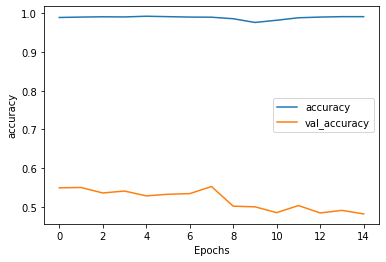

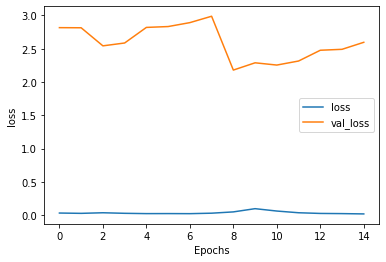

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
#get the predictions for the test data for functional model
import sklearn.model_selection
import sklearn.metrics
import sklearn.preprocessing

predictions = model_fusion.predict([X_test_txt, X_test_img])

In [ ]:
accuracy = sklearn.metrics.accuracy_score(Y_test_combined_data, np.argmax(predictions, axis=1))
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))

Accuracy: 49.14


In [ ]:
print('Classification Report:')
print(sklearn.metrics.classification_report(Y_test_combined_data, np.argmax(predictions, axis=1)))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(Y_test_combined_data, np.argmax(predictions, axis=1)))

Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.08      0.09       103
           1       0.55      0.82      0.66       473
           2       0.38      0.10      0.16       293

    accuracy                           0.49       869
   macro avg       0.34      0.33      0.30       869
weighted avg       0.44      0.49      0.42       869

Confusion Matrix:
[[  8  87   8]
 [ 43 389  41]
 [ 31 232  30]]


## Combined Model with add at Last Layer (Intermediate fusion)


In [ ]:
#merge text and image model
img_text_merge=tf.keras.layers.concatenate([text_part,img_part])

#dense layers
dense_merge = tf.keras.layers.Dense(32, activation='relu')(img_text_merge)
drop= tf.keras.layers.Dropout(rate=0.3)(dense_merge)

dense_merge = tf.keras.layers.Dense(32, activation='relu')(drop)

merge_late=tf.keras.layers.Dense(3, activation='softmax')(dense_merge)

model_fusion_intermediate = tf.keras.Model(inputs=[text_input,image_input], outputs=merge_late)


In [ ]:
# compiling the model
model_fusion_intermediate.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [ ]:
# defining model checkpointing

# checkpoint to save best model during training
#mc = ModelCheckpoint("weights.best.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

mc=tf.keras.callbacks.ModelCheckpoint("weights.fm.cnn.best.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
# EarlyStopping with patience - means training will be stopped if val loss is not reduced for 5 continous epochs
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)

In [ ]:
Y_train_img

array([[1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [ ]:
# training the model for number of epochs
history=model_fusion_intermediate.fit([X_train_txt,X_train_img], Y_train_txt, batch_size=32, epochs=15, verbose=1, validation_data=([X_valid_txt, X_valid_img], Y_valid_txt), callbacks=[mc])

Epoch 1/15
88/88 [==============================] - ETA: 0s - loss: 0.1312 - accuracy: 0.9536
Epoch 00001: val_accuracy improved from -inf to 0.42583, saving model to weights.fm.cnn.best.hdf5
88/88 [==============================] - 16s 150ms/step - loss: 0.1312 - accuracy: 0.9536 - val_loss: 2.1257 - val_accuracy: 0.4258
Epoch 2/15
88/88 [==============================] - ETA: 0s - loss: 0.0265 - accuracy: 0.9943
Epoch 00002: val_accuracy improved from 0.42583 to 0.52000, saving model to weights.fm.cnn.best.hdf5
88/88 [==============================] - 12s 135ms/step - loss: 0.0265 - accuracy: 0.9943 - val_loss: 2.6161 - val_accuracy: 0.5200
Epoch 3/15
88/88 [==============================] - ETA: 0s - loss: 0.0281 - accuracy: 0.9943
Epoch 00003: val_accuracy did not improve from 0.52000
88/88 [==============================] - 12s 133ms/step - loss: 0.0281 - accuracy: 0.9943 - val_loss: 3.1415 - val_accuracy: 0.5200
Epoch 4/15
88/88 [==============================] - ETA: 0s - loss: 

In [ ]:
# training the model for number of epochs
history=model_fusion_intermediate.fit([X_train_txt,X_train_img], [Y_train_txt,Y_train_img], batch_size=32, epochs=15, verbose=1, validation_data=([X_valid_txt, X_valid_img], [Y_valid_txt,Y_valid_img]), callbacks=[mc])

Epoch 1/15
88/88 [==============================] - ETA: 0s - loss: 0.0225 - accuracy: 0.9961
Epoch 00001: val_accuracy did not improve from 0.52000
88/88 [==============================] - 14s 145ms/step - loss: 0.0225 - accuracy: 0.9961 - val_loss: 3.9566 - val_accuracy: 0.4125
Epoch 2/15
88/88 [==============================] - ETA: 0s - loss: 0.0249 - accuracy: 0.9961
Epoch 00002: val_accuracy did not improve from 0.52000
88/88 [==============================] - 12s 136ms/step - loss: 0.0249 - accuracy: 0.9961 - val_loss: 5.0868 - val_accuracy: 0.4283
Epoch 3/15
88/88 [==============================] - ETA: 0s - loss: 0.0248 - accuracy: 0.9950
Epoch 00003: val_accuracy did not improve from 0.52000
88/88 [==============================] - 12s 136ms/step - loss: 0.0248 - accuracy: 0.9950 - val_loss: 4.2131 - val_accuracy: 0.4475
Epoch 4/15
88/88 [==============================] - ETA: 0s - loss: 0.0228 - accuracy: 0.9946
Epoch 00004: val_accuracy did not improve from 0.52000
88/88 [=

In [ ]:
# accuracy on training set
score = model_fusion_intermediate.evaluate([X_train_txt,X_train_img], Y_train_combined, verbose=0)
print('train loss:', score[0])
print('train accuracy:', score[1])

train loss: 22.9683895111084
train accuracy: 0.3253571391105652


In [ ]:
# accuracy on validation set

score = model_fusion_intermediate.evaluate([X_valid_txt, X_valid_img], Y_valid_combined, verbose=0)
print('Valid loss:', score[0])
print('Valid accuracy:', score[1])

Valid loss: 6.3073883056640625
Valid accuracy: 0.31166666746139526


In [ ]:
# accuracy on validation set

score = model_fusion_intermediate.evaluate([X_test_txt, X_test_img],Y_test_combined, verbose=0)
print('test loss:', score[0])
print('test accuracy:', score[1])

test loss: 5.894798278808594
test accuracy: 0.5178365707397461


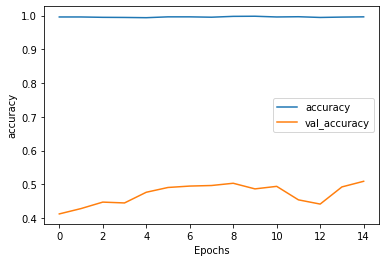

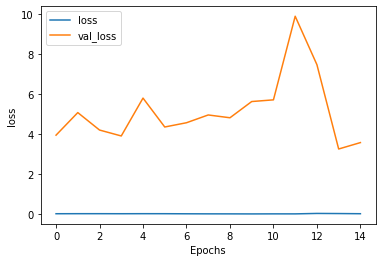

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
#get the predictions for the test data for functional model
import sklearn.model_selection
import sklearn.metrics
import sklearn.preprocessing

predictions = model_fusion_intermediate.predict([X_test_txt, X_test_img])

In [ ]:
accuracy = sklearn.metrics.accuracy_score(Y_test_combined_data, np.argmax(predictions, axis=1))
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))

Accuracy: 51.78


In [ ]:
print('Classification Report:')
print(sklearn.metrics.classification_report(Y_test_combined_data, np.argmax(predictions, axis=1)))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(Y_test_combined_data, np.argmax(predictions, axis=1)))

Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.08      0.09       103
           1       0.55      0.92      0.69       473
           2       0.60      0.03      0.06       293

    accuracy                           0.52       869
   macro avg       0.42      0.34      0.28       869
weighted avg       0.52      0.52      0.41       869

Confusion Matrix:
[[  8  93   2]
 [ 36 433   4]
 [ 27 257   9]]


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

def plot_graphs(history, string):
  plt.plot(history[string])
  plt.plot(history['val_'+string])
  plt.xlabel("Epoch")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [ ]:
late_fusion = {"Epoch":list(np.arange(1,16)),
              "accuracy":[22.33, 24.68, 27.22, 36.75, 46.79, 53.21, 53.51, 54.12, 57.97, 59.12, 66.03, 67.40, 69.36, 70.13, 70.23],
              "val_accuracy": [21.33, 22.68, 26.22, 32.75, 45.79, 49.21, 52.51, 52.12, 55.00, 59.10, 61.03, 64.40, 66.36, 67.13, 67.23, 64.67],
              "loss":[3.14, 2.16, 2.00, 2.22, 2.15, 2.23, 1.70, 1.53, 1.43, 1.33, 1.23, 1.11, 0.80, 0.79, 0.66],
              "val_loss":[2.70, 2.45, 2.18, 2.14, 2.02, 1.89, 1.70, 1.40, 1.32, 1.21, 0.91, 0.90, 0.62, 0.55, 0.50]}

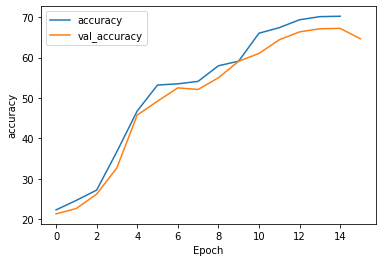

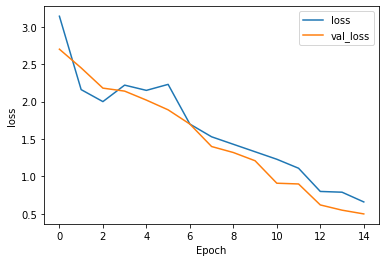

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_graphs(late_fusion, 'accuracy')
plot_graphs(late_fusion, 'loss')